##### Import Required Libraries 

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

##### Load The Dataset 

In [7]:
df = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


##### Select a region of interest 

In [46]:
region = df[df['City']=='Århus'][['dt', 'AverageTemperature']]

In [47]:
region['Year'] = pd.to_datetime(region['dt']).dt.year

##### Drop any rows with Missing Values

In [48]:
region.dropna(inplace=True)

In [49]:
region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3166 entries, 0 to 3237
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dt                  3166 non-null   object 
 1   AverageTemperature  3166 non-null   float64
 2   Year                3166 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 98.9+ KB


In [50]:
region.head()

,dt,AverageTemperature,Year
0,1743-11-01,6.068,1743
5,1744-04-01,5.788,1744
6,1744-05-01,10.644,1744
7,1744-06-01,14.051,1744
8,1744-07-01,16.082,1744


##### Split the Data into Training and Testing sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(region[['Year']], region['AverageTemperature'], test_size=0.8, random_state=123)

In [53]:
print('Training predictor variable shape:', X_train.shape)
print('Training target variable shape:', y_train.shape)
print('Testing predictor variable shape:', X_test.shape)
print('Testing target variable shape:', y_test.shape)

Training predictor variable shape: (633, 1)
Training target variable shape: (633,)
Testing predictor variable shape: (2533, 1)
Testing target variable shape: (2533,)


###### Fit a Linear Regression to the Training Data

In [58]:
lr_ = LinearRegression()

In [59]:
lr_.fit(X_train, y_train)

LinearRegression()

###### Making a Prediction on the Test Data

In [60]:
y_pred = lr_.predict(X_test)

##### Calculate the mean squared error of the prediction

In [61]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error', mse)

Mean squared error 44.20384727977371


##### Plot the prediction and the actual values

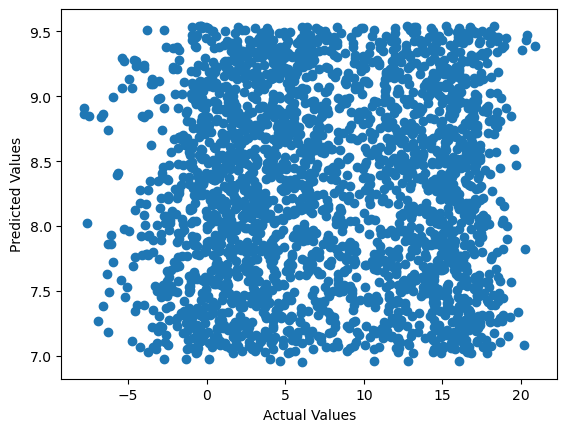

In [62]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()